In [1]:
# Je prends les bibliothèques que je vais utliser
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Input,Activation,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import os,sys,csv,cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

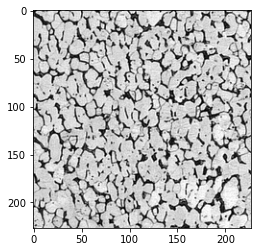

In [3]:
DATADIR= ( r"C:\Users\AK05780\Desktop\data_micro_struc\train")
CATEGORIES=["go","nogo"]
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)#path to go or nogo
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [4]:
# quelques hyperparamètres pour comparer les métriques 
IMG_SIZE=227

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#plt.imshow(new_array,cmap='gray')
#plt.show()
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)#path to go or nogo
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:   
                pass
create_training_data()    



In [5]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])


1
1
1
1
1
1
1
1
1
1


In [6]:
X=[];y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)    
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()
pickle_in = open("X.pickle" , "rb")
print(pickle_in)
X = pickle.load(pickle_in)
X[1]
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))
X=X/255.0

<_io.BufferedReader name='X.pickle'>


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, np.array(y), test_size=0.3)# avec random state
print(x_train.shape)
#np.reshape(y_train,[y_train.shape[0],1])
y_train=y_train.reshape(([y_train.shape[0],1]))
print(y_train.shape)
#np.reshape(y_val,[y_val.shape[0],1])
print(x_val.shape)
y_val=y_val.reshape(([y_val.shape[0],1]))
print(y_val.shape)
print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_val shape:{}".format(y_val.shape))
print("y_val shape:{}".format(y_val.shape))

(7498, 227, 227, 1)
(7498, 1)
(3214, 227, 227, 1)
(3214, 1)
x_train shape:(7498, 227, 227, 1)
y_train shape:(7498, 1)
x_val shape:(3214, 1)
y_val shape:(3214, 1)


In [8]:

# préparation des données pour le test
DATADIR_test= ( r"C:\Users\AK05780\Desktop\data_micro_struc\test")
CATEGORIES=["go","nogo"]
for category in CATEGORIES:
    path=os.path.join(DATADIR_test, category)#path to go or nogo
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img_array,cmap="gray")
        #plt.show()
        break
    break
    

#print(img_array)

#print(img_array.shape)
#IMG_SIZE=225
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#plt.imshow(new_array,cmap='gray')
#plt.show()

test_data=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR_test, category)#path to go or nogo
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            except Exception as e:   
                pass
create_test_data()
#print(test_data)

#random.shuffle(test_data)
#for sample in test_data[:50]:
#    print(sample[1])

X_test=[];y_test=[]
for features,label in training_data:
    X_test.append(features)
    y_test.append(label)
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)    
import pickle
#pickle_out=open("X.pickle","wb")
pickle_out=open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

#pickle_out=open("y.pickle","wb")
pickle_out=open("y_test.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()
pickle_out=open("y_test.pickle","wb")#ajout
pickle.dump(y_test,pickle_out)#ajout
pickle_out.close()#ajout
pickle_out=open("y_test.pickle","wb")#out
pickle.dump(y_test,pickle_out)#out
#pickle_in = open("X.pickle" , "rb")
pickle_in = open("X_test.pickle" , "rb")
print(pickle_in)
X_test = pickle.load(pickle_in)
X_test[1]
X_test=pickle.load(open("X_test.pickle","rb"))
y_test=pickle.load(open("y_test.pickle","rb"))
X_test=X_test/255.0




<_io.BufferedReader name='X_test.pickle'>


In [9]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding="same" , input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

#j'avais mis ici en suspend
model.add(Conv2D(32, (3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(64, (3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Flatten())
#model.add(Dense(64))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])





In [10]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 227, 227, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 113, 113, 16)      9232      
_________________________________________________________________
activation_1 (Activation)    (None, 113, 113, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 16)        0

In [11]:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, np.array(y), test_size=0.3,random_state=25)
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 1)
print(x_train.shape)
#np.reshape(y_train,[y_train.shape[0],1])
y_train=y_train.reshape(([y_train.shape[0],1]))
print(y_train.shape)
#np.reshape(y_val,[y_val.shape[0],1])
print(x_val.shape)
y_val=y_val.reshape(([y_val.shape[0],1]))
print(y_val.shape)

(7498, 227, 227, 1)
(7498, 1)
(3214, 227, 227, 1)
(3214, 1)


In [12]:

bs=75# pour le batch_size
ep=100#pour l'epochs
ver=1#pour verbose
wk=1#pour workers

#model=compile_model()
history=model.fit(
                  x_train,
                  y_train,
                  verbose=ver,
                  batch_size=bs,
                  validation_data=(x_val,y_val),
                  epochs=ep,
                  #seed=42,
                  #workers=wk,
                  shuffle=True,
                  #callbacks=10
    
                 )

Epoch 1/100
100/100 [==============================] - 290s 3s/step - loss: 0.3505 - accuracy: 0.8872 - val_loss: 0.3081 - val_accuracy: 0.8905
Epoch 2/100
100/100 [==============================] - 247s 2s/step - loss: 0.3047 - accuracy: 0.8926 - val_loss: 0.2850 - val_accuracy: 0.8905
Epoch 3/100
100/100 [==============================] - 241s 2s/step - loss: 0.2790 - accuracy: 0.8926 - val_loss: 0.2509 - val_accuracy: 0.8905
Epoch 4/100
100/100 [==============================] - 240s 2s/step - loss: 0.2543 - accuracy: 0.8976 - val_loss: 0.3270 - val_accuracy: 0.8771
Epoch 5/100
100/100 [==============================] - 240s 2s/step - loss: 0.2476 - accuracy: 0.8976 - val_loss: 0.2470 - val_accuracy: 0.8852
Epoch 6/100
100/100 [==============================] - 239s 2s/step - loss: 0.2326 - accuracy: 0.9006 - val_loss: 0.2252 - val_accuracy: 0.8927
Epoch 7/100
100/100 [==============================] - 239s 2s/step - loss: 0.2428 - accuracy: 0.8958 - val_loss: 0.2343 - val_accuracy:

100/100 [==============================] - 234s 2s/step - loss: 0.0459 - accuracy: 0.9835 - val_loss: 0.1998 - val_accuracy: 0.9459
Epoch 58/100
100/100 [==============================] - 234s 2s/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.3638 - val_accuracy: 0.9480
Epoch 59/100
100/100 [==============================] - 234s 2s/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.2567 - val_accuracy: 0.9521
Epoch 60/100
100/100 [==============================] - 235s 2s/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.2458 - val_accuracy: 0.9431
Epoch 61/100
100/100 [==============================] - 234s 2s/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.4022 - val_accuracy: 0.9462
Epoch 62/100
100/100 [==============================] - 236s 2s/step - loss: 0.0177 - accuracy: 0.9937 - val_loss: 0.2779 - val_accuracy: 0.9496
Epoch 63/100
100/100 [==============================] - 233s 2s/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.3228 - val_accuracy: 0.953

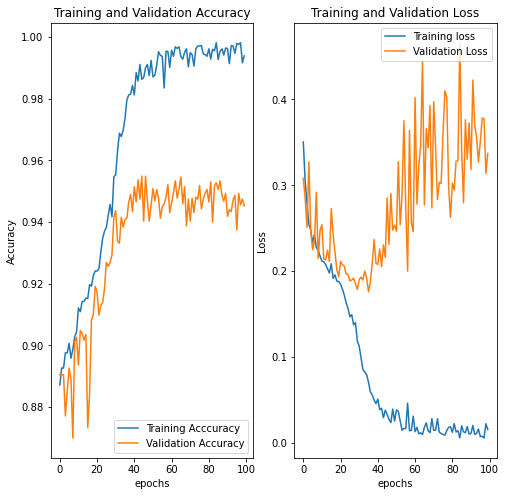

accuracy 99.38650131225586 % val_accuracy 94.52396035194397 %
loss 0.015176880173385143 val_loss 0.33698731660842896
la moyenne précision est de : 96.83435589075089
la variance est de : 9190.29359607111
écart type par rapport à la précision  est de : 95.86601898520199


In [13]:


#Y.test.reshape()
#results=pd.DataFrame({"Filename":y_test,
 #                     "Predictions":pred})
#results.to_csv("results.csv",index=False)
'''
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()                       
print('moyenne accuracy',sum(acc)/len(acc)*100,'%','moyenne val_accuracy',sum(val_acc)/len(val_acc)*100,"%") 
'''
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(ep)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc,label='Validation Accuracy')
plt.plot(acc,label="Training Acccuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel("Accuracy")


plt.subplot(1,2,2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.plot(loss, label="Training loss")
plt.plot(val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel("Loss")

plt.show()

print('accuracy',(acc[-1])*100,'%','val_accuracy',(val_acc[-1])*100,"%") 
print('loss',(loss[-1])*100/100,'val_loss',(val_loss[-1])*100/100) 
import math
mean =sum(acc)/len(acc)*100; print('la moyenne précision est de :', mean)
var=sum((l-mean)**2 for l in acc)/ len(acc);print('la variance est de :', var)
st_dev=math.sqrt(var);print('écart type par rapport à la précision  est de :', st_dev)

In [14]:
pred=model.predict_generator(X_test,verbose=1)
print(X_test.shape)
print(pred.shape)


Instructions for updating:
Please use Model.predict, which supports generators.
335/335 [==============================] - 72s 216ms/step
(10712, 227, 227, 1)
(10712, 1)


In [15]:
from sklearn.metrics import f1_score

#f1_score(y_test, pred, average='macro')
f1_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='macro')

0.47145606157793457

In [16]:

#f1_score(y_test, pred, average='binary')
#f1_score([int(i) for i in test_labels], [int(i > 0) for i in pred], average='binary')
f1_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='binary')


0.9429121231558691

In [17]:
#f1_score(y_test,pred,average='micro')
f1_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='micro')

0.8919902912621359

In [18]:
#f1_score(y_test,pred,average='weighted')
f1_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='weighted')

0.8410684593684027

In [19]:
tf.keras.metrics.Precision(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)

In [20]:
from sklearn.metrics import precision_score
#precision_score(y_test,pred,average='macro')
precision_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='macro')



C:\Users\AK05780\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.44599514563106796

In [21]:
#precision_score(y_test,pred,average='micro')
precision_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='micro')


0.8919902912621359

In [22]:
from sklearn.metrics import recall_score
recall_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='macro')
 

0.5

In [23]:
recall_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='micro')

0.8919902912621359

In [24]:
recall_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='binary')

1.0

In [25]:
recall_score([int(i) for i in y_test], [int(i > 0) for i in pred], average='weighted')

0.8919902912621359

In [26]:
recall_score([int(i) for i in y_test], [int(i > 0) for i in pred], average=None)

array([0., 1.])

In [27]:
recall_score([int(i) for i in y_test], [int(i > 0) for i in pred], average=None,zero_division=1)

array([0., 1.])

In [28]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix([int(i) for i in y_test], [int(i > 0) for i in pred])


array([[   0, 1157],
       [   0, 9555]], dtype=int64)

In [31]:
#confusion_matrix([int(i) for i in y_test], [int(i > 0) for i in pred],labels=["0","1"])

C:\Users\AK05780\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:309: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [9]:
#pour s'amuser un peu
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)# surveiller ici
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

(7498, 227, 227, 1)
(7498, 1)
(3214, 227, 227, 1)
(3214, 1)
x_train shape:(7498, 227, 227, 1)
y_train shape:(7498, 1)
x_val shape:(3214, 1)
y_val shape:(3214, 1)


AttributeError: 'str' object has no attribute 'copy'